<a href="https://colab.research.google.com/github/Tanveer132/Classfication-Types-in-Machine-Learning/blob/main/FST_Practice_RandomForest(HyperTuning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest Algorithm 

data - diabetes

model - RandomForestClassifier()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x=df.drop(columns='Outcome')
y=df['Outcome']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [5]:
#model
model=RandomForestClassifier()
model.fit(xtrain,ytrain)

ypred=model.predict(xtest)

Accuracy : 0.7922077922077922
Report :               precision    recall  f1-score   support

           0       0.85      0.85      0.85       107
           1       0.66      0.66      0.66        47

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154



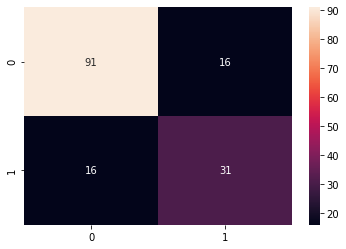

In [7]:
#accuracy
acc=accuracy_score(ytest,ypred)
report=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print("Accuracy :",acc)
print("Report :",report)
sns.heatmap(cm,annot=True)

#Tunnig parameters of RandomForestClassofier

In [10]:
# help(RandomForestClassifier)
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold

Parameters :


    n_estimators : integer, optional (default=100)
     The number of trees in the forest. 
    If "auto", then `max_features=sqrt(n_features)`.
          - If "sqrt", then `max_features=sqrt(n_features)` 
          - If "log2", then `max_features=log2(n_features)`.
          - If None, then `max_features=n_features`.
      

In [14]:
#estimator
model=RandomForestClassifier()

#param_grid
params={"n_estimators":[5,10,100,1000],
        "max_features":['sqrt','log2']}

#cross validator
kfold=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

#grid
grid_cv=GridSearchCV(estimator=model,param_grid=params,cv=kfold,scoring='accuracy')

In [15]:
result=grid_cv.fit(xtrain,ytrain)

In [16]:
print(result.best_score_)
print(result.best_params_)

0.7505064640810343
{'max_features': 'sqrt', 'n_estimators': 1000}


In [17]:
#model
model=RandomForestClassifier(max_features='sqrt',n_estimators=1000)
model.fit(xtrain,ytrain)

ypred=model.predict(xtest)

Accuracy : 0.8116883116883117
Report :               precision    recall  f1-score   support

           0       0.85      0.88      0.87       107
           1       0.70      0.66      0.68        47

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154



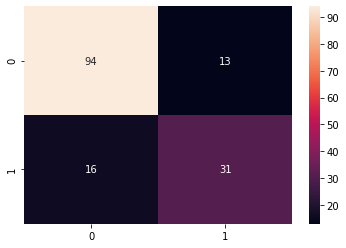

In [18]:
#accuracy
acc=accuracy_score(ytest,ypred)
report=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print("Accuracy :",acc)
print("Report :",report)
sns.heatmap(cm,annot=True)